 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://127.0.0.1:8888/notebooks/CMBLensing.jl/docs/joint_MAP_example.ipynb#Initialization" data-toc-modified-id="Initialization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="http://127.0.0.1:8888/notebooks/CMBLensing.jl/docs/joint_MAP_example.ipynb#Compute-spectra" data-toc-modified-id="Compute-spectra-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Compute spectra</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/CMBLensing.jl/docs/joint_MAP_example.ipynb#Configure-the-type-of-data" data-toc-modified-id="Configure-the-type-of-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Configure the type of data</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/CMBLensing.jl/docs/joint_MAP_example.ipynb#Generate-simulated-data" data-toc-modified-id="Generate-simulated-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Generate simulated data</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/CMBLensing.jl/docs/joint_MAP_example.ipynb#Examine-simulated-data" data-toc-modified-id="Examine-simulated-data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Examine simulated data</a></span></li></ul></li><li><span><a href="http://127.0.0.1:8888/notebooks/CMBLensing.jl/docs/joint_MAP_example.ipynb#Run-the-minimizer" data-toc-modified-id="Run-the-minimizer-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run the minimizer</a></span></li><li><span><a href="http://127.0.0.1:8888/notebooks/CMBLensing.jl/docs/joint_MAP_example.ipynb#Examine-results" data-toc-modified-id="Examine-results-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Examine results</a></span></li></ul></div>

# Initialization

In [1]:
using CMBLensing
using PyPlot
using Parameters

┌ Info: Recompiling stale cache file /home/marius/.julia/compiled/v1.1/CMBLensing/niPeo.ji for CMBLensing [b60c06c0-7e54-11e8-3788-4bd722d65317]
└ @ Base loading.jl:1184


## Compute spectra

First, compute the fiducial CMB power spectra which generate our simulated data,

In [2]:
Cℓ = camb(r=0.05);

Next, chose the noise power-spectra we are assuming,

In [3]:
Cℓn = noisecls(1, ℓknee=100);

Plot these up for reference,

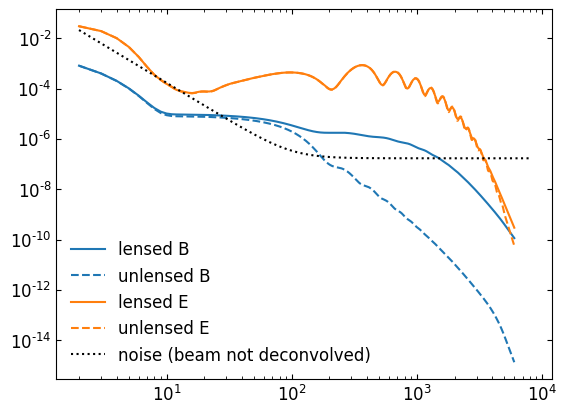

In [4]:
loglog(Cℓ[:f̃][:BB],c="C0")
loglog(Cℓ[:f][:BB],"--",c="C0")
loglog(Cℓ[:f̃][:EE],c="C1")
loglog(Cℓ[:f][:EE],"--",c="C1")
loglog(Cℓn[:BB],"k:")
legend(["lensed B","unlensed B","lensed E","unlensed E", "noise (beam not deconvolved)"]);

## Configure the type of data

These describe the setup of the simulated data we are going to work with (and can be changed),

In [5]:
Θpix  = 3        # pixel size in arcmin
Nside = 128      # number of pixels per side in the map
use   = :P       # type of data to use (can be :T, :P, or :TP)
T     = Float32  # data type (Float32 is ~2 as fast as Float64);

## Generate simulated data

With these defined, the following generates the simulated data and returns the true unlensed and lensed CMB fields, `f` and `f̃` ,and the true lensing potential, `ϕ`, as well as a number of other quantities stored in the "DataSet" object `ds`. 

In [6]:
@unpack f, f̃, ϕ, ds = load_sim_dataset(
    seed = 3,
    Cℓ = Cℓ,
    Cℓn = Cℓn,
    θpix = Θpix,
    T = T,
    Nside = Nside,
    use = use,
)

@unpack Cf, Cϕ = ds;

## Examine simulated data

The true $\phi$ map,

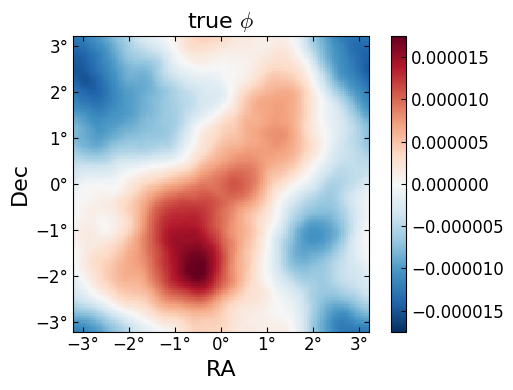

In [7]:
plot(ϕ, title = raw"true $\phi$");

The "true" unlensed field, $f$,

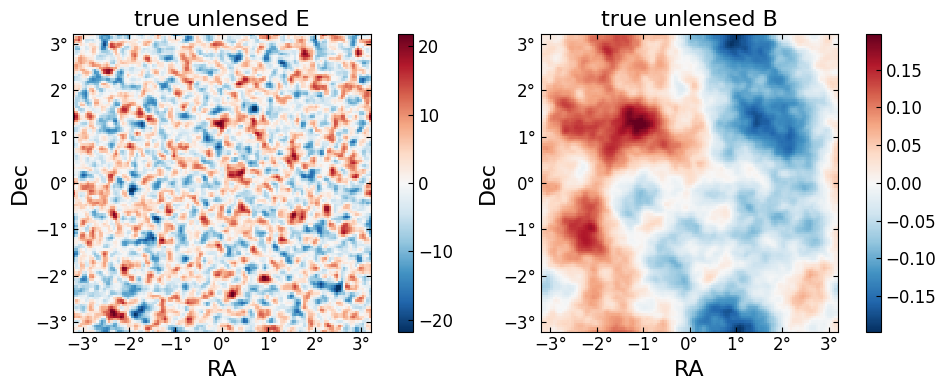

In [8]:
plot(f, title = "true unlensed " .* ["E" "B"]);

And the "true" lensed field,

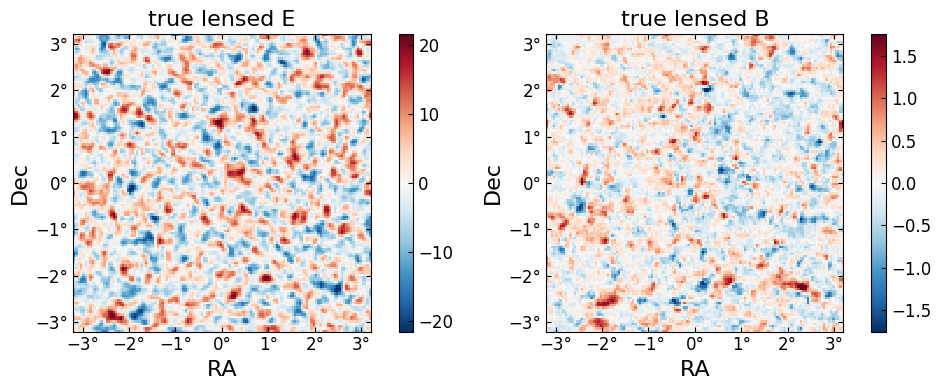

In [9]:
plot(LenseFlow(ϕ)*f, title = "true lensed " .* ["E" "B"]);

The data (stored in the `ds` object) is basically `f̃` with a beam applied plus a sample of the noise,

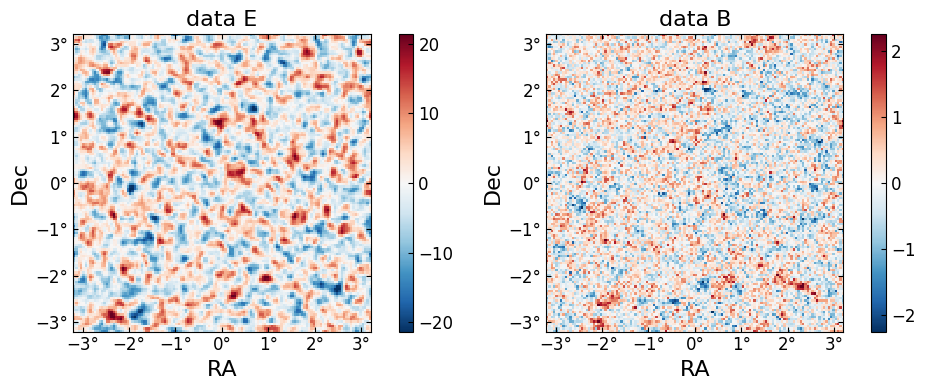

In [10]:
plot(ds.d, title = "data " .* ["E" "B"]);

# Run the minimizer

Now we compute the maximum of the joint posterior, $\mathcal{P}\big(f, \phi \,\big|\,d\big)$

In [11]:
@time fbf, ϕbf, tr = MAP_joint(ds, nsteps=30, progress=true, αmax=0.3);

(step=1, χ²=43095.79, Ncg=5)
(step=2, χ²=37543.49, Ncg=7, α=0.014462)
(step=3, χ²=35741.61, Ncg=6, α=0.023435)
(step=4, χ²=35070.68, Ncg=6, α=0.014318)
(step=5, χ²=34555.49, Ncg=6, α=0.026880)
(step=6, χ²=34267.12, Ncg=6, α=0.012814)
(step=7, χ²=33964.64, Ncg=6, α=0.036058)
(step=8, χ²=33789.71, Ncg=6, α=0.010863)
(step=9, χ²=33504.85, Ncg=6, α=0.069608)
(step=10, χ²=33369.26, Ncg=6, α=0.009044)
(step=11, χ²=32967.68, Ncg=6, α=0.229131)
(step=12, χ²=32906.38, Ncg=5, α=0.008829)
(step=13, χ²=32867.10, Ncg=5, α=0.073871)
(step=14, χ²=32845.12, Ncg=5, α=0.009594)
(step=15, χ²=32777.38, Ncg=5, α=0.223282)
(step=16, χ²=32750.20, Ncg=5, α=0.010426)
(step=17, χ²=32742.77, Ncg=3, α=0.029755)
(step=18, χ²=32737.78, Ncg=3, α=0.022749)
(step=19, χ²=32734.01, Ncg=3, α=0.018574)
(step=20, χ²=32730.63, Ncg=3, α=0.019817)
(step=21, χ²=32727.56, Ncg=3, α=0.016116)
(step=22, χ²=32724.41, Ncg=3, α=0.022718)
(step=23, χ²=32721.61, Ncg=3, α=0.014738)
(step=24, χ²=32718.56, Ncg=3, α=0.025886)
(step=25, χ²=

# Examine results

The expected value of the final best-fit $\chi^2 (=-2\log \mathcal{P}$) is given by the number degrees of freedom in the data, i.e. the total number of pixels in T and/or EB.

In [12]:
χ² = -2tr[end][:lnPcur]

32689.02668806845

In [13]:
dof = getproperty((T=1, P=2, TP=3),use) * Nside^2

32768

Here's how far away our final $\chi^2$ is from this expectation, in units of $\sigma$. We expect this should be somewhere in the range (-3,3) for about 99.7% of simulated datasets.

In [14]:
(χ² - dof)/sqrt(2dof)

-0.30848949973261597

Here's the best-fit $\phi$ relative to the truth,

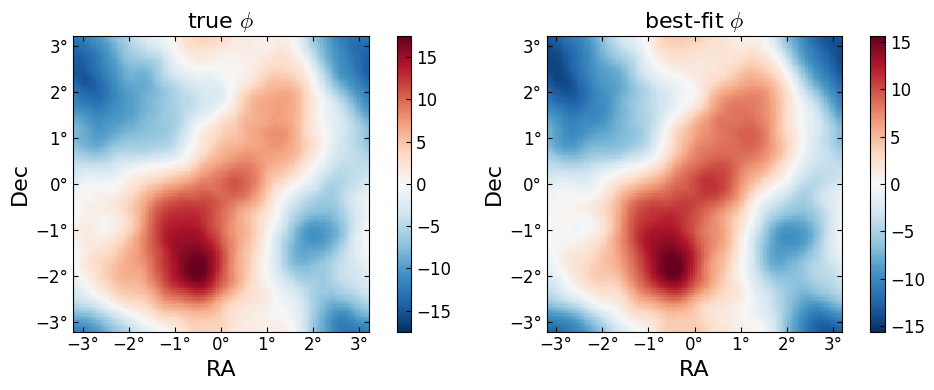

In [15]:
plot(10^6*[ϕ ϕbf], title=["true" "best-fit"] .* raw" $\phi$");

Here is the difference in terms of the power spectra. Note the best-fit has high-$\ell$ power suppressed, like a Wiener filter solution (in fact what we're doing here is akin to a non-linear Wiener filter). In the high S/N region ($\ell\lesssim1000$), the difference is approixmately equal to the noise, which you can see is almost two orders of magnitude below the signal.

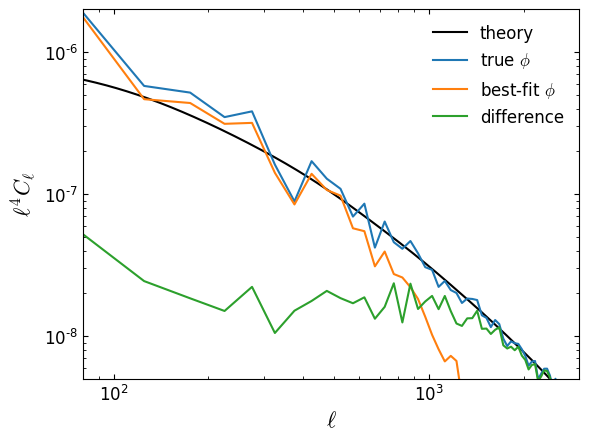

In [16]:
loglog(ℓ⁴ * Cℓ[:f][:ϕϕ], "k")
loglog(ℓ⁴ * get_Cℓ(ϕ))
loglog(ℓ⁴ * get_Cℓ(ϕbf))
loglog(ℓ⁴ * get_Cℓ(ϕbf-ϕ))
xlim(80,3000)
ylim(5e-9,2e-6)
legend(["theory",raw"true $\phi$", raw"best-fit $\phi$", "difference"])
xlabel(raw"$\ell$")
ylabel(raw"$\ell^4 C_\ell$");

The best-fit unlensed fields relative to truth,

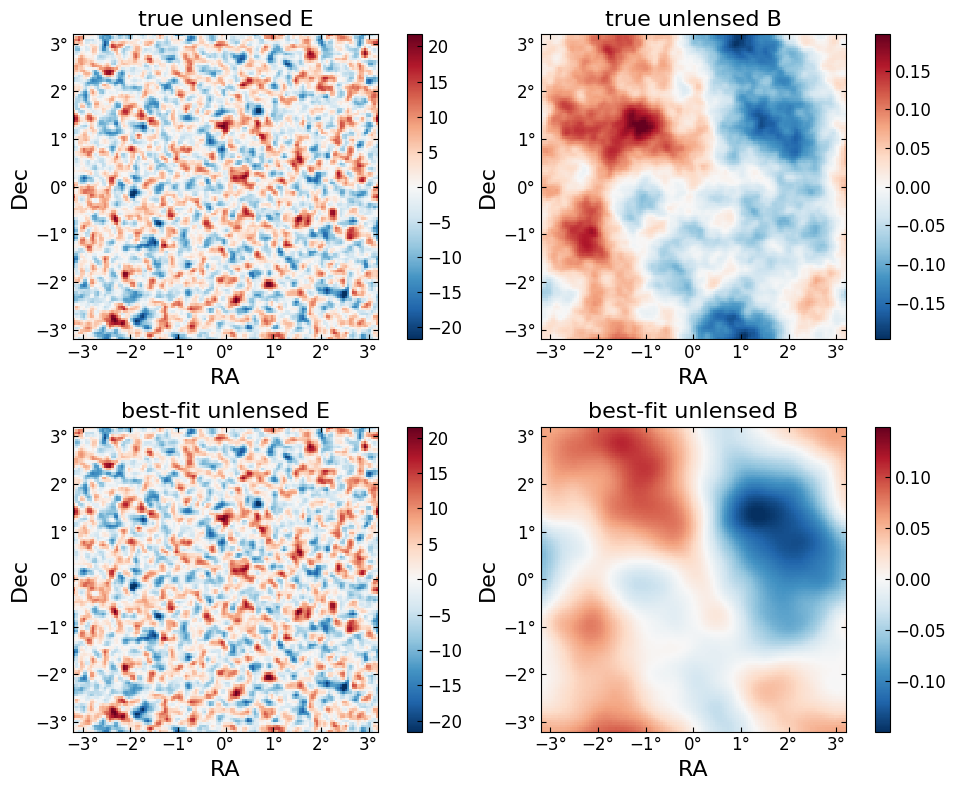

In [17]:
plot([f,fbf], title = ["true", "best-fit"] .* " unlensed " .* ["E" "B"]);

The best-fit lensed field (bottom row) relative to truth (top row),

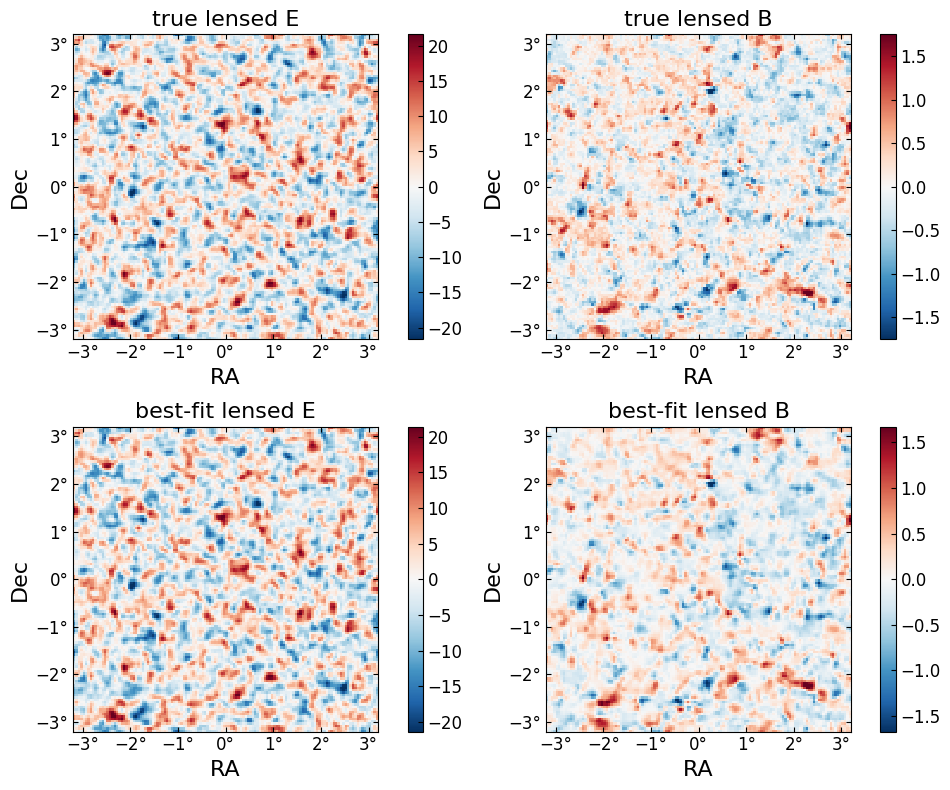

In [18]:
plot([f̃, LenseFlow(ϕbf)*fbf], title = ["true", "best-fit"] .* " lensed " .* ["E" "B"]);